In [2]:
import pickle
import glob
import matplotlib.pyplot as plt
import numpy as np
import psrchive
from copy import deepcopy as cp
from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import importlib

from merit_support_funcs import funcs_plot

importlib.reload(funcs_plot)

<module 'merit_support_funcs.funcs_plot' from '/fred/oz103/ahamid/PSRFINET/test_eval_model/predict_model/post_processing/merit_support_funcs/funcs_plot.py'>

In [3]:
#True Label First
L_agree_labs_dir = '/home/ahamid/my_symlink/ahamid/PSRFINET/data_under_test/clfd_cg_mix/L_basic_aggreement'
L_clfd_labs_dir = '/home/ahamid/my_symlink/ahamid/PSRFINET/data_under_test/L_clfd_labels/clfd_std-var-lfamp_1.75/'
L_coastguard_labs_dir = '/home/ahamid/my_symlink/ahamid/PSRFINET/data_under_test/L_coastguard_labels/cg_surgical-bandwagon/set_01/'

UHF_agree_labs_dir = '/home/ahamid/my_symlink/ahamid/PSRFINET/data_under_test/clfd_cg_mix/UHF_basic_aggreement'
UHF_clfd_labs_dir = '/home/ahamid/my_symlink/ahamid/PSRFINET/data_under_test/UHF_clfd_labels/clfd_std-var-lfamp_1.75/'
UHF_coastguard_labs_dir = '/home/ahamid/my_symlink/ahamid/PSRFINET/data_under_test/UHF_coastguard_labels/cg_surgical-bandwagon/set_01/'

L_ag_labs = glob.glob(L_agree_labs_dir+'/*')
L_clfd_labs = glob.glob(L_clfd_labs_dir+'/*')
L_coastguard_labs = glob.glob(L_coastguard_labs_dir+'/*')

L_mixed_labs = L_clfd_labs + L_coastguard_labs

UHF_ag_labs = glob.glob(UHF_agree_labs_dir+'/*')
UHF_clfd_labs = glob.glob(UHF_clfd_labs_dir+'/*')
UHF_coastguard_labs = glob.glob(UHF_coastguard_labs_dir+'/*')

UHF_mixed_labs = UHF_clfd_labs + UHF_coastguard_labs

#Now for the predictions
abstrct_preds_dir = '/home/ahamid/my_symlink/ahamid/PSRFINET/test_eval_model/predict_model/predict_pickles/abstrct_preds/'
abstrct_preds = glob.glob(abstrct_preds_dir+'*')

In [4]:
#Do not forget. These are the mission parameters.

#For all 8 sets of prodictions

#calculate precision recall

#F1 score

#Area under the ROC

#Compare and interpret

#If you are talking about a network. The job of which is to flag good channels. Your models are performing well.

#If you are talking about a network the job of which is to flag bad channels. Your model is bad and is worth very little

#Play this to the narrative #Its having 99 percent accuracy of detecting good channels. Which is a nugget of wisdom

#At the imbalanced game of detecting RFI the network is as good as random guessing which is not a good thing.

#The thing is right now. SKLEARN is fine. We conclude that SKLEARN IS FINE. Its doing its job.

#Next up we need the God view. All models all scores.

In [5]:
#Agree
agree_L_AUROC = []
agree_L_AUPRC = []
agree_L_F1score = []
for k in range(0, len(abstrct_preds)):

    if('agree' in abstrct_preds[k]):
        if('_L_' in abstrct_preds[k].replace(abstrct_preds_dir, '')):
            with open(abstrct_preds[k], 'rb') as fid:
                agree_L_predictions=pickle.load(fid)
            for l in range(0, len(agree_L_predictions)): 
                for t in range(0,len(L_ag_labs)):
                    if(agree_L_predictions[l][0][19:29]+"_"+agree_L_predictions[l][0][57:-3] == L_ag_labs[t][101:-4]):
                        data_label = np.load(L_ag_labs[t])
                        #The array: agree_L_predictions[l][1]
                        AUROC, AUPRC, F1score= funcs_plot.try_again(data_label, agree_L_predictions[l][1] , False  )
                        agree_L_AUROC.append(AUROC)
                        agree_L_AUPRC.append(AUPRC)
                        agree_L_F1score.append(F1score)
                        #print(agree_L_predictions[l][0][19:29]+"_"+agree_L_predictions[l][0][57:-3])
                        #print(L_ag_labs[t][101:-4])
                        print("\n")

Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.35639212 0.37261596 0.39901876 ... 0.54102284 0.5797706  0.50939757]
Threshold steps: 80
AUROC: 0.9838966180673717
AUPRC: 0.8603562814960284
Max F1: 0.7692307692307693


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.3872926  0.36601242 0.35589895 ... 0.426625   0.5073911  0.55245674]
Threshold steps: 80
AUROC: 0.9664426042063685
AUPRC: 0.7328918675395457
Max F1: 0.6733668341708542


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.30725625 0.3723544  0.37027833 ... 0.47562492 0.56175715 0.57082844]
Threshold steps: 80
AUROC: 0.9595368525896415
AUPRC: 0.292646028190893
Max F1: 0.4324324324324324


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.4760427  0.3563168  0.37843266 ... 0.5202814  0.5523736  0.58962864]
Threshold steps: 80
AUROC: 0.9527183248990203
AUPRC: 0.7180452113591153
Max F1: 0.6884057971014493


Analytics is awesome!
True Labels: [1 1 1 ...

AUROC: 0.9710017230576441
AUPRC: 0.7553014984384331
Max F1: 0.7251908396946566


Analytics is awesome!
True Labels: [0 0 0 ... 1 1 1]
Predictions: [0.3852486  0.3076699  0.3943051  ... 0.5285091  0.5661709  0.57159114]
Threshold steps: 80
AUROC: 0.9763061499903605
AUPRC: 0.8635202002282513
Max F1: 0.7793427230046949


Analytics is awesome!
True Labels: [0 0 0 ... 1 1 1]
Predictions: [0.34970713 0.3466023  0.4382774  ... 0.49224135 0.48661533 0.56874996]
Threshold steps: 80
AUROC: 0.9538252508361204
AUPRC: 0.6409312970364365
Max F1: 0.6833333333333333


Analytics is awesome!
True Labels: [0 0 0 ... 1 1 1]
Predictions: [0.11074115 0.4610854  0.33241412 ... 0.7735254  0.71109474 0.3039353 ]
Threshold steps: 80
AUROC: 0.8855102424356325
AUPRC: 0.39072353267109183
Max F1: 0.5829596412556054


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.28474954 0.32958466 0.38951787 ... 0.5008904  0.4987478  0.5728718 ]
Threshold steps: 80
AUROC: 0.9343093859947793
AUPRC: 0.28775320

AUROC: 0.9160711965700922
AUPRC: 0.6792915497138738
Max F1: 0.6353790613718412


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.42771026 0.33984765 0.3809055  ... 0.51215225 0.5053612  0.57801056]
Threshold steps: 80
AUROC: 0.925077325719724
AUPRC: 0.5319523320996525
Max F1: 0.5284974093264249


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.04981416 0.3447528  0.11416068 ... 0.7712045  0.4839751  0.16658393]
Threshold steps: 80
AUROC: 0.94620670995671
AUPRC: 0.5575894297201072
Max F1: 0.7209302325581396


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.37978894 0.38496584 0.32752615 ... 0.62305295 0.54759574 0.51528764]
Threshold steps: 80
AUROC: 0.9606740684506865
AUPRC: 0.6586683604209189
Max F1: 0.6013071895424837


Analytics is awesome!
True Labels: [1 1 1 ... 0 0 0]
Predictions: [0.3977389  0.32333273 0.35767147 ... 0.5467901  0.5224361  0.5515043 ]
Threshold steps: 80
AUROC: 0.939919166796207
AUPRC: 0.6102817413141

AUROC: 0.9512631788342948
AUPRC: 0.7287863181445228
Max F1: 0.6909090909090909


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.42736346 0.39723888 0.41904294 ... 0.50191844 0.59226006 0.52273774]
Threshold steps: 80
AUROC: 0.9864901746724891
AUPRC: 0.8815991493981767
Max F1: 0.8378378378378377


Analytics is awesome!
True Labels: [0 0 0 ... 1 1 1]
Predictions: [0.39638928 0.30103192 0.42426568 ... 0.54225004 0.52060205 0.55472225]
Threshold steps: 80
AUROC: 0.9609068856129874
AUPRC: 0.6945364868392314
Max F1: 0.6739130434782609


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.42093754 0.42120418 0.35468876 ... 0.50761664 0.58179027 0.51542896]
Threshold steps: 80
AUROC: 0.9255572998430142
AUPRC: 0.3799925539194347
Max F1: 0.4594594594594595


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.37541744 0.34841847 0.3721304  ... 0.5093018  0.50989646 0.55125445]
Threshold steps: 80
AUROC: 0.9091113416320885
AUPRC: 0.542547039

AUROC: 0.9742294057561738
AUPRC: 0.7796044402966639
Max F1: 0.715686274509804


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.24743527 0.51307917 0.21817042 ... 0.536737   0.4416779  0.5483394 ]
Threshold steps: 80
AUROC: 0.9810080706563119
AUPRC: 0.8913986858325043
Max F1: 0.8463356973995273


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.32970506 0.36863622 0.37685323 ... 0.51763576 0.5521074  0.56119287]
Threshold steps: 80
AUROC: 0.9628219078708742
AUPRC: 0.7626036133839638
Max F1: 0.6748971193415638


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.28518757 0.30208164 0.4052332  ... 0.5188568  0.54682606 0.55066663]
Threshold steps: 80
AUROC: 0.9715518408470676
AUPRC: 0.8545899325378842
Max F1: 0.8035714285714286


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.3337615  0.3449561  0.35463378 ... 0.5049952  0.49265078 0.52541167]
Threshold steps: 80
AUROC: 0.9495000968212068
AUPRC: 0.7370846921

In [6]:
agree_UHF_AUROC = []
agree_UHF_AUPRC = []
agree_UHF_F1score = []
for k in range(0, len(abstrct_preds)):
    if('agree' in abstrct_preds[k]):
        if('_UHF_' in abstrct_preds[k].replace(abstrct_preds_dir, '')):
            with open(abstrct_preds[k], 'rb') as fid:
                agree_UHF_predictions=pickle.load(fid)
            for l in range(0, len(agree_UHF_predictions)): 
                for t in range(0,len(UHF_ag_labs)):
                    if(agree_UHF_predictions[l][0][19:29]+"_"+agree_UHF_predictions[l][0][56:-3] == UHF_ag_labs[t][103:-4]):                        
                        data_label = np.load(UHF_ag_labs[t])
                        #The array: agree_L_predictions[l][1]
                        AUROC, AUPRC, F1score= funcs_plot.try_again(data_label, agree_UHF_predictions[l][1] , False  )
                        agree_UHF_AUROC.append(AUROC)
                        agree_UHF_AUPRC.append(AUPRC)
                        agree_UHF_F1score.append(F1score)
                        #print(agree_L_predictions[l][0][19:29]+"_"+agree_L_predictions[l][0][57:-3])
                        #print(L_ag_labs[t][101:-4])
                        print("\n")

Analytics is awesome!
True Labels: [1 1 1 ... 0 0 0]
Predictions: [0.8743004  0.79552627 0.9037819  ... 0.7798378  0.8128244  0.85329247]
Threshold steps: 80
AUROC: 0.9799512987012987
AUPRC: 0.6011499749240962
Max F1: 0.826923076923077


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.81239486 0.7673005  0.82954204 ... 0.7606956  0.764271   0.8095434 ]
Threshold steps: 80
AUROC: 0.9989790836653387
AUPRC: 0.900722228996307
Max F1: 0.888888888888889


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.7403196  0.73228514 0.7784411  ... 0.68736196 0.7871504  0.7404367 ]
Threshold steps: 80
AUROC: 0.9925498629215544
AUPRC: 0.9092746662310763
Max F1: 0.9223300970873787


Analytics is awesome!
True Labels: [0 0 1 ... 0 0 0]
Predictions: [0.82240015 0.7347549  0.78721243 ... 0.57549465 0.8191574  0.7716808 ]
Threshold steps: 80
AUROC: 0.9855259026687598
AUPRC: 0.6814479052673889
Max F1: 0.8200000000000001


Analytics is awesome!
True Labels: [0 0 0 ... 0

AUROC: 0.9739158047541282
AUPRC: 0.7430390485394157
Max F1: 0.9130434782608695


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.8008637  0.7984985  0.86626786 ... 0.84362626 0.8371177  0.8755274 ]
Threshold steps: 80
AUROC: 0.9897267641996558
AUPRC: 0.6396156379394308
Max F1: 0.9056603773584904


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.75745624 0.7358914  0.74821717 ... 0.7177749  0.68275446 0.77347237]
Threshold steps: 80
AUROC: 0.9991533864541833
AUPRC: 0.8064205923337368
Max F1: 0.9302325581395349


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.7785436  0.76110953 0.7792379  ... 0.70772415 0.76392573 0.7507722 ]
Threshold steps: 80
AUROC: 0.9945215873738523
AUPRC: 0.8698209312462847
Max F1: 0.920863309352518


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.76399285 0.8439097  0.8624911  ... 0.7747388  0.75795543 0.8094879 ]
Threshold steps: 80
AUROC: 0.9665562160932983
AUPRC: 0.5392670782

AUROC: 0.9980237154150198
AUPRC: 0.6629611330698287
Max F1: 0.9090909090909091


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.75171435 0.7295741  0.78722966 ... 0.60753274 0.80694    0.7542848 ]
Threshold steps: 80
AUROC: 0.9784295046271094
AUPRC: 0.7334553736863818
Max F1: 0.7692307692307693


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.8496164  0.859221   0.94569075 ... 0.92236245 0.6427264  0.89363307]
Threshold steps: 80
AUROC: 0.8786171857742434
AUPRC: 0.21875186728893836
Max F1: 0.8


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.8461712  0.78877443 0.8203453  ... 0.7510571  0.79753494 0.8114371 ]
Threshold steps: 80
AUROC: 0.9561795891318754
AUPRC: 0.7778293306036279
Max F1: 0.8750000000000001


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.8533515  0.8003373  0.86194605 ... 0.77032876 0.7958476  0.8140756 ]
Threshold steps: 80
AUROC: 0.9940265145675967
AUPRC: 0.7339184294723662
Max F1

AUROC: 0.9927166915469303
AUPRC: 0.8527218458840373
Max F1: 0.9157894736842105


Analytics is awesome!
True Labels: [1 1 1 ... 0 1 0]
Predictions: [0.7909652  0.82955307 0.829334   ... 0.7610089  0.76971465 0.7192586 ]
Threshold steps: 80
AUROC: 0.990418898744182
AUPRC: 0.8011808806282064
Max F1: 0.8495575221238938


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.9397283  0.9122654  0.9318579  ... 0.8915382  0.82600355 0.9401496 ]
Threshold steps: 80
AUROC: 0.996801850843767
AUPRC: 0.501407020059058
Max F1: 0.9333333333333332


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.8526276  0.8961368  0.856914   ... 0.75936216 0.7454839  0.90738046]
Threshold steps: 80
AUROC: 0.9658274431917753
AUPRC: 0.3322859420926198
Max F1: 0.8275862068965517


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.76861084 0.75325406 0.8042416  ... 0.69090736 0.82420546 0.7705102 ]
Threshold steps: 80
AUROC: 0.8906417112299465
AUPRC: 0.686107123941

AUROC: 0.9667550254031367
AUPRC: 0.3513348396267107
Max F1: 0.8095238095238096


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.8483509  0.88600814 0.9762047  ... 0.9284275  0.56197953 0.93306637]
Threshold steps: 80
AUROC: 0.9823762838468721
AUPRC: 0.6508073752894794
Max F1: 0.8606060606060607


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.77200514 0.7597269  0.8496927  ... 0.71616644 0.72478455 0.8281266 ]
Threshold steps: 80
AUROC: 0.9623313343328336
AUPRC: 0.7201859997781074
Max F1: 0.8292682926829268


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.9029128  0.8960953  0.9742628  ... 0.9556453  0.58607423 0.9571724 ]
Threshold steps: 80
AUROC: 0.942654569488674
AUPRC: 0.7132800862425214
Max F1: 0.8839779005524863


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.76206297 0.9282046  0.9740165  ... 0.8895488  0.5898257  0.9340718 ]
Threshold steps: 80
AUROC: 0.746327967806841
AUPRC: 0.20668796262

In [7]:
#They are in order don't think about it

In [8]:
clfd_L_AUROC = []
clfd_L_AUPRC = []
clfd_L_F1score = []
for k in range(0, len(abstrct_preds)):
    if('clfd' in abstrct_preds[k]):
        if('_L_' in abstrct_preds[k].replace(abstrct_preds_dir, '')):
            with open(abstrct_preds[k], 'rb') as fid:
                clfd_L_predictions=pickle.load(fid)
            for l in range(0, len(clfd_L_predictions)): #len(clfd_L_predictions)
                for t in range(0,len(L_clfd_labs)):
                    if(clfd_L_predictions[l][0][19:29]+"_"+clfd_L_predictions[l][0][57:-3] == L_clfd_labs[t][99:-4]):
                        data_label = np.load(L_clfd_labs[t])
                        #The array: agree_L_predictions[l][1]
                        AUROC, AUPRC, F1score= funcs_plot.try_again(data_label, clfd_L_predictions[l][1] , False  )
                        clfd_L_AUROC.append(AUROC)
                        clfd_L_AUPRC.append(AUPRC)
                        clfd_L_F1score.append(F1score)
                        #print(agree_L_predictions[l][0][19:29]+"_"+agree_L_predictions[l][0][57:-3])
                        #print(L_ag_labs[t][101:-4])
                        print("\n")
                        

Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.33877268 0.34584907 0.35357243 ... 0.46201476 0.50039697 0.49099958]
Threshold steps: 80
AUROC: 0.9681607865818391
AUPRC: 0.7885640887223646
Max F1: 0.7280701754385965


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.35969585 0.42550662 0.39729932 ... 0.47091973 0.52090293 0.38322183]
Threshold steps: 80
AUROC: 0.9581288563638972
AUPRC: 0.7331592108530085
Max F1: 0.669260700389105


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.2572611  0.3040112  0.3009041  ... 0.35311723 0.39765647 0.48660484]
Threshold steps: 80
AUROC: 0.7462670110887097
AUPRC: 0.192296171247521
Max F1: 0.3448275862068966


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.37709606 0.39102203 0.4081477  ... 0.5202095  0.5937495  0.50390494]
Threshold steps: 80
AUROC: 0.9474581776839369
AUPRC: 0.7225561069548128
Max F1: 0.64797507788162


Analytics is awesome!
True Labels: [1 1 1 ... 0 

AUROC: 0.969483262918427
AUPRC: 0.78632722270081
Max F1: 0.7461538461538462


Analytics is awesome!
True Labels: [0 0 0 ... 1 1 1]
Predictions: [0.3518637  0.34898296 0.41623223 ... 0.4808621  0.51610595 0.5680271 ]
Threshold steps: 80
AUROC: 0.9686948006186906
AUPRC: 0.8306918221278052
Max F1: 0.7741935483870968


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.34973678 0.35587907 0.408898   ... 0.47602123 0.4786943  0.5447855 ]
Threshold steps: 80
AUROC: 0.8574397980801627
AUPRC: 0.653279862696667
Max F1: 0.6585858585858587


Analytics is awesome!
True Labels: [0 0 0 ... 1 1 1]
Predictions: [0.03017325 0.04296426 0.05024864 ... 0.06571353 0.1990434  0.52005583]
Threshold steps: 80
AUROC: 0.878686759956943
AUPRC: 0.3939429354669206
Max F1: 0.5593869731800767


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.34519947 0.40418315 0.36380714 ... 0.49866378 0.51513207 0.5483881 ]
Threshold steps: 80
AUROC: 0.8473115491009681
AUPRC: 0.34139938996203

AUROC: 0.9260334105596879
AUPRC: 0.7000990264676954
Max F1: 0.6289752650176679


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.3522006  0.39887896 0.37049216 ... 0.49657074 0.58646256 0.5223316 ]
Threshold steps: 80
AUROC: 0.9220203168745911
AUPRC: 0.5508210307501649
Max F1: 0.5415384615384615


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.0121875  0.05663412 0.01328515 ... 0.10076321 0.03693185 0.6692188 ]
Threshold steps: 80
AUROC: 0.9348616121981409
AUPRC: 0.4902134339573525
Max F1: 0.7070707070707072


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.35461614 0.3670357  0.3343388  ... 0.5103002  0.5272038  0.48093033]
Threshold steps: 80
AUROC: 0.9426428236554819
AUPRC: 0.6531601674874999
Max F1: 0.5838509316770186


Analytics is awesome!
True Labels: [1 1 1 ... 0 0 0]
Predictions: [0.359815   0.39210397 0.35885638 ... 0.51408744 0.54069215 0.50441664]
Threshold steps: 80
AUROC: 0.9330102956967417
AUPRC: 0.623231680

AUROC: 0.9293732642681063
AUPRC: 0.7734345266770668
Max F1: 0.7098976109215017


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.36534342 0.37992495 0.39837924 ... 0.38111487 0.5167308  0.40497184]
Threshold steps: 80
AUROC: 0.9818736293859649
AUPRC: 0.8678906857739488
Max F1: 0.8035714285714286


Analytics is awesome!
True Labels: [0 0 0 ... 1 1 1]
Predictions: [0.33707735 0.46677813 0.39495727 ... 0.5199502  0.47341216 0.4245587 ]
Threshold steps: 80
AUROC: 0.951752463844923
AUPRC: 0.6804869572590655
Max F1: 0.6874999999999999


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.32948565 0.44270304 0.4390847  ... 0.5367165  0.5938751  0.50844383]
Threshold steps: 80
AUROC: 0.8829790599101665
AUPRC: 0.44871772218017736
Max F1: 0.47798742138364786


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.36682922 0.40898803 0.41288835 ... 0.53786784 0.50384617 0.5167517 ]
Threshold steps: 80
AUROC: 0.8478962303559339
AUPRC: 0.46700464

AUROC: 0.972502450902881
AUPRC: 0.795658332463986
Max F1: 0.7357512953367875


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.41678315 0.45412126 0.34108022 ... 0.41487938 0.42112413 0.36837566]
Threshold steps: 80
AUROC: 0.9789634002639517
AUPRC: 0.918049292992786
Max F1: 0.8646080760095012


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.30982316 0.32060048 0.36748597 ... 0.5149202  0.49005222 0.5129239 ]
Threshold steps: 80
AUROC: 0.9527652947719688
AUPRC: 0.7242720253269157
Max F1: 0.6666666666666667


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.3361949  0.37472823 0.3445256  ... 0.5242823  0.4746419  0.5924824 ]
Threshold steps: 80
AUROC: 0.9735722698973582
AUPRC: 0.8495750016387661
Max F1: 0.8053333333333333


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.3590037  0.436061   0.36502552 ... 0.5206218  0.4685509  0.505523  ]
Threshold steps: 80
AUROC: 0.9438724510195922
AUPRC: 0.727515406852

In [9]:
clfd_UHF_AUROC = []
clfd_UHF_AUPRC = []
clfd_UHF_F1score = []

for k in range(0, len(abstrct_preds)):
    if('clfd' in abstrct_preds[k]):
        if('_UHF_' in abstrct_preds[k].replace(abstrct_preds_dir, '')):
            with open(abstrct_preds[k], 'rb') as fid:
                clfd_UHF_predictions=pickle.load(fid)
            for l in range(0, len(clfd_UHF_predictions)): 
                for t in range(0,len(UHF_clfd_labs)):
                    if(clfd_UHF_predictions[l][0][19:29]+"_"+clfd_UHF_predictions[l][0][56:-3] == UHF_clfd_labs[t][101:-4]):
                        data_label = np.load(UHF_clfd_labs[t])
                        #The array: agree_L_predictions[l][1]
                        AUROC, AUPRC, F1score= funcs_plot.try_again(data_label, clfd_UHF_predictions[l][1] , False  )
                        clfd_UHF_AUROC.append(AUROC)
                        clfd_UHF_AUPRC.append(AUPRC)
                        clfd_UHF_F1score.append(F1score)
                        #print(agree_L_predictions[l][0][19:29]+"_"+agree_L_predictions[l][0][57:-3])
                        #print(L_ag_labs[t][101:-4])
                        print("\n")

Analytics is awesome!
True Labels: [1 1 1 ... 0 0 0]
Predictions: [0.841141   0.8637859  0.81549966 ... 0.8293     0.87242055 0.8230823 ]
Threshold steps: 80
AUROC: 0.926892709563164
AUPRC: 0.4828690649522492
Max F1: 0.6142857142857143


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.80134356 0.79767066 0.7867523  ... 0.722858   0.77438956 0.7616249 ]
Threshold steps: 80
AUROC: 0.9456471883313458
AUPRC: 0.6488165257890385
Max F1: 0.6666666666666667


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.74228346 0.75237036 0.65431476 ... 0.71019024 0.7035527  0.7251269 ]
Threshold steps: 80
AUROC: 0.923589655047072
AUPRC: 0.654615602211442
Max F1: 0.6690647482014388


Analytics is awesome!
True Labels: [0 0 1 ... 0 0 0]
Predictions: [0.7447608  0.7056021  0.71908224 ... 0.64438885 0.7158844  0.74180657]
Threshold steps: 80
AUROC: 0.9468067443919717
AUPRC: 0.552861489650455
Max F1: 0.6433566433566434


Analytics is awesome!
True Labels: [0 0 0 ... 0 

AUROC: 0.9367528778040142
AUPRC: 0.6388888512526951
Max F1: 0.7021276595744681


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.7707386  0.8516974  0.8303926  ... 0.7968336  0.83325857 0.7751938 ]
Threshold steps: 80
AUROC: 0.9307336182336183
AUPRC: 0.6321778827738082
Max F1: 0.6976744186046512


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.76970047 0.7935407  0.73491323 ... 0.7061178  0.7091422  0.7318534 ]
Threshold steps: 80
AUROC: 0.9281345565749236
AUPRC: 0.5719201740473465
Max F1: 0.6176470588235294


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.76842874 0.7127485  0.75925905 ... 0.7174179  0.7129883  0.7769568 ]
Threshold steps: 80
AUROC: 0.9245846896396902
AUPRC: 0.6441404326510805
Max F1: 0.7053571428571428


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.79413784 0.79098064 0.8054392  ... 0.75092363 0.79925376 0.7691143 ]
Threshold steps: 80
AUROC: 0.9301348547717843
AUPRC: 0.621358993

AUROC: 0.8841084915756965
AUPRC: 0.4254137474613422
Max F1: 0.4651162790697675


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.75093126 0.70274866 0.77260953 ... 0.700057   0.7332682  0.7196882 ]
Threshold steps: 80
AUROC: 0.9294178102895835
AUPRC: 0.5566014631404734
Max F1: 0.5813953488372093


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.7857923  0.80898446 0.8464383  ... 0.7832175  0.8159686  0.80293185]
Threshold steps: 80
AUROC: 0.9424537695590327
AUPRC: 0.5466248753666568
Max F1: 0.515625


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.7736624  0.76196384 0.7575196  ... 0.72841036 0.74362284 0.7737434 ]
Threshold steps: 80
AUROC: 0.9017373043146238
AUPRC: 0.4976908246633103
Max F1: 0.4888888888888889


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.82199264 0.81364614 0.80048066 ... 0.7938575  0.8374029  0.83430207]
Threshold steps: 80
AUROC: 0.89593632265511
AUPRC: 0.5417529638839358
Max 

AUROC: 0.9589979158691676
AUPRC: 0.6811430626539083
Max F1: 0.7188940092165899


Analytics is awesome!
True Labels: [1 1 1 ... 0 1 0]
Predictions: [0.8041239  0.710601   0.80615383 ... 0.75516564 0.8346534  0.7977363 ]
Threshold steps: 80
AUROC: 0.9507038035339922
AUPRC: 0.6473335399581578
Max F1: 0.662251655629139


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.8833508  0.8980274  0.88882643 ... 0.8786387  0.83956337 0.84670997]
Threshold steps: 80
AUROC: 0.8853963295587661
AUPRC: 0.429151914661888
Max F1: 0.676056338028169


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.79992    0.86366117 0.87256587 ... 0.8344626  0.7763253  0.8132978 ]
Threshold steps: 80
AUROC: 0.8624962348366604
AUPRC: 0.4444296596460021
Max F1: 0.5633802816901409


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.7508107  0.69401413 0.75453216 ... 0.6612819  0.78794575 0.737711  ]
Threshold steps: 80
AUROC: 0.8600697471665214
AUPRC: 0.456381919913

AUROC: 0.930845619460354
AUPRC: 0.47197008471115476
Max F1: 0.6904761904761905


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.84688914 0.76883006 0.6902457  ... 0.734337   0.7946497  0.7774214 ]
Threshold steps: 80
AUROC: 0.9789169644645437
AUPRC: 0.7847234223400895
Max F1: 0.8073394495412843


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.72952485 0.7869909  0.80031985 ... 0.77184504 0.8145262  0.75280464]
Threshold steps: 80
AUROC: 0.9591991570073761
AUPRC: 0.6526858074415807
Max F1: 0.7209302325581395


Analytics is awesome!
True Labels: [0 0 0 ... 0 0 0]
Predictions: [0.84587395 0.7603142  0.73466057 ... 0.7633504  0.7750086  0.7592456 ]
Threshold steps: 80
AUROC: 0.9355592319647065
AUPRC: 0.593786972919892
Max F1: 0.6553191489361703


Analytics is awesome!
True Labels: [1 1 1 ... 1 1 1]
Predictions: [0.83798814 0.7620464  0.7418035  ... 0.74147797 0.8343155  0.7736084 ]
Threshold steps: 80
AUROC: 0.798958626512806
AUPRC: 0.38112846487

In [10]:
coastguard_L_AUROC = []
coastguard_L_AUPRC = []
coastguard_L_F1score = []

for k in range(0, len(abstrct_preds)):
    if('coastguard' in abstrct_preds[k]):
        if('_L_' in abstrct_preds[k].replace(abstrct_preds_dir, '')):
            with open(abstrct_preds[k], 'rb') as fid:
                coastguard_L_predictions=pickle.load(fid)
            for l in range(0, len(coastguard_L_predictions)): 
                for t in range(0,len(L_coastguard_labs)):
                    if(coastguard_L_predictions[l][0][19:29]+"_"+coastguard_L_predictions[l][0][57:-3] == L_coastguard_labs[t][108:-4]):
                        data_label = np.load(L_coastguard_labs[t])
                        #The array: agree_L_predictions[l][1]
                        AUROC, AUPRC, F1score= funcs_plot.try_again(data_label, coastguard_L_predictions[l][1] , False  )
                        coastguard_L_AUROC.append(AUROC)
                        coastguard_L_AUPRC.append(AUPRC)
                        coastguard_L_F1score.append(F1score)
                        #print(agree_L_predictions[l][0][19:29]+"_"+agree_L_predictions[l][0][57:-3])
                        #print(L_ag_labs[t][101:-4])
                        print("\n")

Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.03179887 0.01678081 0.01425903 ... 0.12252834 0.10034227 0.09840164]
Threshold steps: 80
AUROC: 0.9899289619083813
AUPRC: 0.8345477591708905
Max F1: 0.8819875776397516


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.02917119 0.03044767 0.02854057 ... 0.15664999 0.13409732 0.11719655]
Threshold steps: 80
AUROC: 0.9871524555477189
AUPRC: 0.8968316469700803
Max F1: 0.8619528619528619


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00821959 0.00845435 0.0054626  ... 0.11428736 0.09118196 0.07553525]
Threshold steps: 80
AUROC: 0.9708963554508765
AUPRC: 0.5126112275263135
Max F1: 0.6700507614213198


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.04076836 0.02105499 0.02141333 ... 0.15208235 0.11662014 0.1155351 ]
Threshold steps: 80
AUROC: 0.979152909237655
AUPRC: 0.9024741303908324
Max F1: 0.8473684210526315


Analytics is awesome!

AUROC: 0.9144806201550387
AUPRC: 0.7152057708388151
Max F1: 0.7528868360277137


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.02270113 0.01251598 0.0123387  ... 0.11098627 0.08462046 0.09332571]
Threshold steps: 80
AUROC: 0.9755670794087558
AUPRC: 0.8930259542160657
Max F1: 0.8382838283828382


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 1.]
Predictions: [0.01808301 0.013182   0.01140575 ... 0.08061123 0.09257434 0.09533606]
Threshold steps: 80
AUROC: 0.9595163872272306
AUPRC: 0.8210114344980604
Max F1: 0.7692307692307693


Analytics is awesome!
True Labels: [0. 0. 0. ... 1. 1. 1.]
Predictions: [0.03512357 0.02311776 0.02451565 ... 0.1055765  0.10171805 0.10835677]
Threshold steps: 80
AUROC: 0.9561989606533036
AUPRC: 0.6750237821186241
Max F1: 0.728624535315985


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00116469 0.00141744 0.00042444 ... 0.01490528 0.01825374 0.02556476]
Threshold steps: 80
AUROC: 0.928207942120

AUROC: 0.9625675611039365
AUPRC: 0.7054894269482677
Max F1: 0.7413793103448275


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.0202513  0.02444871 0.01297108 ... 0.14543673 0.12275544 0.11956474]
Threshold steps: 80
AUROC: 0.9723746081504703
AUPRC: 0.8263072638810987
Max F1: 0.848


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 1.]
Predictions: [0.0038047  0.00750636 0.00243886 ... 0.06547733 0.06173428 0.07184637]
Threshold steps: 80
AUROC: 0.9232967747931963
AUPRC: 0.6958954024410348
Max F1: 0.7735849056603775


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.02065134 0.01066315 0.01184356 ... 0.10612819 0.08903138 0.08576438]
Threshold steps: 80
AUROC: 0.9639087923570683
AUPRC: 0.8307231416524391
Max F1: 0.7602739726027397


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [1.01131096e-04 1.36471572e-04 2.61836485e-05 ... 1.24826264e-02
 8.40249099e-03 1.64562017e-02]
Threshold steps: 80
AUROC: 0

AUROC: 0.9556284615655978
AUPRC: 0.6758579075454649
Max F1: 0.7592592592592593


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.01112573 0.01123084 0.01032741 ... 0.14809588 0.10127069 0.0875535 ]
Threshold steps: 80
AUROC: 0.9723419638853043
AUPRC: 0.8207602766747518
Max F1: 0.7699530516431924


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.01649084 0.01953627 0.01147828 ... 0.10289258 0.08364021 0.06969356]
Threshold steps: 80
AUROC: 0.9841816471571906
AUPRC: 0.8697061133878015
Max F1: 0.8177777777777777


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00213531 0.0081411  0.00528629 ... 0.04209542 0.0584438  0.08757325]
Threshold steps: 80
AUROC: 0.9664433522784475
AUPRC: 0.5861638794503308
Max F1: 0.7664233576642336


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00600716 0.01243391 0.00589137 ... 0.0720573  0.07405651 0.09288052]
Threshold steps: 80
AUROC: 0.98714112221

AUROC: 0.9085230685230685
AUPRC: 0.5822530942150234
Max F1: 0.5592417061611374


Analytics is awesome!
True Labels: [0. 0. 0. ... 1. 1. 1.]
Predictions: [0.03170873 0.02415319 0.01687394 ... 0.12461532 0.12292449 0.11783102]
Threshold steps: 80
AUROC: 0.9628010321100917
AUPRC: 0.7421413968082656
Max F1: 0.7918088737201365


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.02781371 0.02076359 0.01734484 ... 0.1293209  0.10864278 0.08605242]
Threshold steps: 80
AUROC: 0.9806766795175368
AUPRC: 0.8002669419840298
Max F1: 0.8059701492537314


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.04944694 0.02343829 0.02660103 ... 0.1312664  0.13059588 0.12007679]
Threshold steps: 80
AUROC: 0.9238516907462069
AUPRC: 0.702556039082783
Max F1: 0.6666666666666667


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.02390504 0.01716017 0.01236611 ... 0.17414625 0.11087424 0.082962  ]
Threshold steps: 80
AUROC: 0.984889397406

In [11]:
coastguard_UHF_AUROC = []
coastguard_UHF_AUPRC = []
coastguard_UHF_F1score = []

for k in range(0, len(abstrct_preds)):
    if('coastguard' in abstrct_preds[k]):
        if('_UHF_' in abstrct_preds[k].replace(abstrct_preds_dir, '')):
            with open(abstrct_preds[k], 'rb') as fid:
                coastguard_UHF_predictions=pickle.load(fid)
            for l in range(0, len(coastguard_UHF_predictions)): 
                for t in range(0,len(UHF_coastguard_labs)):
                    if(coastguard_UHF_predictions[l][0][19:29]+"_"+coastguard_UHF_predictions[l][0][56:-3] == UHF_coastguard_labs[t][110:-4]):
                        data_label = np.load(UHF_coastguard_labs[t])
                        #The array: agree_L_predictions[l][1]
                        AUROC, AUPRC, F1score= funcs_plot.try_again(data_label, coastguard_UHF_predictions[l][1] , False  )
                        coastguard_UHF_AUROC.append(AUROC)
                        coastguard_UHF_AUPRC.append(AUPRC)
                        coastguard_UHF_F1score.append(F1score)
                        #print(agree_L_predictions[l][0][19:29]+"_"+agree_L_predictions[l][0][57:-3])
                        #print(L_ag_labs[t][101:-4])
                        print("\n")

Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00122519 0.00176501 0.00166632 ... 0.02698187 0.02339143 0.02249157]
Threshold steps: 80
AUROC: 0.9887536677625764
AUPRC: 0.5807865137872248
Max F1: 0.9172932330827068


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00283807 0.00437137 0.00239532 ... 0.04054956 0.04986573 0.04625677]
Threshold steps: 80
AUROC: 0.9995132060921534
AUPRC: 0.5841645315476384
Max F1: 0.9779735682819383


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00603105 0.00743304 0.01270311 ... 0.07156788 0.09352316 0.0890744 ]
Threshold steps: 80
AUROC: 0.9929374258255184
AUPRC: 0.7957096770668762
Max F1: 0.9547038327526133


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00575147 0.00732013 0.00707203 ... 0.04351836 0.07963911 0.05274491]
Threshold steps: 80
AUROC: 0.997797552836485
AUPRC: 0.6406244413355898
Max F1: 0.9482071713147411


Analytics is awesome!

AUROC: 0.9824244030208217
AUPRC: 0.1976112340578642
Max F1: 0.9170731707317074


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00172697 0.0013221  0.00078177 ... 0.02438274 0.02492892 0.02818494]
Threshold steps: 80
AUROC: 0.9938173998292275
AUPRC: 0.500222519360195
Max F1: 0.9655172413793104


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 1. 0.]
Predictions: [0.00249633 0.00263333 0.00203194 ... 0.03543158 0.0354572  0.03247727]
Threshold steps: 80
AUROC: 0.993927001953125
AUPRC: 0.5916784624629695
Max F1: 0.9561752988047808


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00970196 0.01000242 0.01108901 ... 0.05628972 0.07438653 0.08607798]
Threshold steps: 80
AUROC: 0.9995360405605778
AUPRC: 0.83089936203295
Max F1: 0.9787234042553191


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00495771 0.00799768 0.00565211 ... 0.06639793 0.09426205 0.07763012]
Threshold steps: 80
AUROC: 0.998613049622977

AUROC: 0.9871594993720497
AUPRC: 0.5319739255746674
Max F1: 0.9494163424124514


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00410567 0.00546854 0.00383871 ... 0.03844754 0.05977154 0.05610659]
Threshold steps: 80
AUROC: 0.9988710960811618
AUPRC: 0.5665527639382296
Max F1: 0.9727272727272728


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.01067117 0.01373862 0.01174649 ... 0.08093107 0.10654019 0.11980244]
Threshold steps: 80
AUROC: 0.9934691906112549
AUPRC: 0.8244464019842039
Max F1: 0.9223300970873787


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00789866 0.0059871  0.00752686 ... 0.05969261 0.06809025 0.06472709]
Threshold steps: 80
AUROC: 0.9957520499689174
AUPRC: 0.6213351641779112
Max F1: 0.919431279620853


Analytics is awesome!
True Labels: [0. 0. 0. ... 1. 1. 1.]
Predictions: [0.00187508 0.00290511 0.00294975 ... 0.04244562 0.04336831 0.02773977]
Threshold steps: 80
AUROC: 0.966094771241

AUROC: 0.9987686743484424
AUPRC: 0.5887804558256191
Max F1: 0.9638554216867471


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00060475 0.0002406  0.00027404 ... 0.00725587 0.00685349 0.01079093]
Threshold steps: 80
AUROC: 0.9781511287625418
AUPRC: 0.3086549509467243
Max F1: 0.9282296650717704


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00615656 0.0066909  0.00535228 ... 0.04477314 0.06836569 0.07064372]
Threshold steps: 80
AUROC: 0.9547881112176414
AUPRC: 0.6286507723228051
Max F1: 0.9148936170212766


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00942833 0.00783546 0.00970748 ... 0.08941288 0.08781368 0.10049972]
Threshold steps: 80
AUROC: 0.9975964805000679
AUPRC: 0.7794402897318652
Max F1: 0.9729729729729729


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.0046852  0.00586341 0.00414691 ... 0.03786657 0.06442235 0.0557146 ]
Threshold steps: 80
AUROC: 0.98312244515

AUROC: 0.9727137709593849
AUPRC: 0.6150969534433592
Max F1: 0.9007633587786259


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [1.6255075e-05 9.1871170e-06 3.6470117e-06 ... 9.2139322e-04 7.0142705e-04
 1.0725652e-03]
Threshold steps: 80
AUROC: 0.9730756330706021
AUPRC: 0.31493120927509594
Max F1: 0.9473684210526316


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00264797 0.00450702 0.00448938 ... 0.03615111 0.05405103 0.02820795]
Threshold steps: 80
AUROC: 0.9994724818638393
AUPRC: 0.6216950159041393
Max F1: 0.9767441860465116


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00380867 0.00584801 0.00229916 ... 0.04772835 0.04175252 0.05161101]
Threshold steps: 80
AUROC: 0.9736380120808935
AUPRC: 0.3700885471651086
Max F1: 0.7812499999999999


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [1.1562061e-04 4.8085767e-05 4.8890739e-05 ... 2.4398770e-03 3.1102840e-03
 3.7986741e-03]
T

In [12]:
mixed_L_AUROC = []
mixed_L_AUPRC = []
mixed_L_F1score = []

for k in range(0, len(abstrct_preds)):
    if('mixed' in abstrct_preds[k]):
        if('_L_' in abstrct_preds[k].replace(abstrct_preds_dir, '')):
            with open(abstrct_preds[k], 'rb') as fid:
                mixed_L_predictions=pickle.load(fid)
            for l in range(0, len(mixed_L_predictions)): 
                for t in range(0,len(L_mixed_labs)):
                    if(mixed_L_predictions[l][0][19:29]+"_"+mixed_L_predictions[l][0][57:-3] == L_mixed_labs[t][108:-4]):
                        data_label = np.load(L_mixed_labs[t])
                        #The array: agree_L_predictions[l][1]
                        AUROC, AUPRC, F1score= funcs_plot.try_again(data_label, mixed_L_predictions[l][1] , False  )
                        mixed_L_AUROC.append(AUROC)
                        mixed_L_AUPRC.append(AUPRC)
                        mixed_L_F1score.append(F1score)
                        #print(agree_L_predictions[l][0][19:29]+"_"+agree_L_predictions[l][0][57:-3])
                        #print(L_ag_labs[t][101:-4])
                        print("\n")

Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.1506556  0.18416794 0.20182258 ... 0.2481873  0.30297998 0.28952286]
Threshold steps: 80
AUROC: 0.9888911626275324
AUPRC: 0.9097425682598826
Max F1: 0.8745980707395498


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.18842976 0.17406605 0.19301835 ... 0.3063164  0.2467784  0.22610112]
Threshold steps: 80
AUROC: 0.9836853632280338
AUPRC: 0.9103051253302783
Max F1: 0.8562091503267973


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.09611145 0.10028065 0.12319037 ... 0.20300193 0.23524004 0.24419215]
Threshold steps: 80
AUROC: 0.9551883609955961
AUPRC: 0.5924953922182337
Max F1: 0.6403940886699506


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.1991335  0.1829444  0.17669444 ... 0.24713604 0.3139331  0.31150737]
Threshold steps: 80
AUROC: 0.9718920439259422
AUPRC: 0.9037662116433804
Max F1: 0.8387096774193549


Analytics is awesome

AUROC: 0.8944315245478036
AUPRC: 0.8004274291194803
Max F1: 0.7533039647577092


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.16225432 0.13633083 0.15447396 ... 0.25720704 0.23377822 0.2355436 ]
Threshold steps: 80
AUROC: 0.9726390799731894
AUPRC: 0.9024833607371993
Max F1: 0.8396501457725947


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 1.]
Predictions: [0.1561137  0.13256468 0.13965414 ... 0.23191339 0.30010262 0.26670825]
Threshold steps: 80
AUROC: 0.951112140871177
AUPRC: 0.8214979699952734
Max F1: 0.7544910179640718


Analytics is awesome!
True Labels: [0. 0. 0. ... 1. 1. 1.]
Predictions: [0.15875413 0.16812858 0.19985922 ... 0.22341482 0.30728012 0.24938647]
Threshold steps: 80
AUROC: 0.9556289108070846
AUPRC: 0.6918869930586462
Max F1: 0.7197231833910034


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.0130624  0.02645449 0.03387752 ... 0.24326107 0.28380653 0.1729599 ]
Threshold steps: 80
AUROC: 0.903450798683

AUROC: 0.9574687903572966
AUPRC: 0.6636037390334482
Max F1: 0.7228915662650602


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.18783662 0.22693798 0.28747085 ... 0.3203645  0.23469682 0.23830506]
Threshold steps: 80
AUROC: 0.9764155564263323
AUPRC: 0.9213821154124751
Max F1: 0.8656716417910447


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 1.]
Predictions: [0.12011871 0.15027149 0.09827864 ... 0.23837432 0.25877142 0.2695302 ]
Threshold steps: 80
AUROC: 0.9339186959754624
AUPRC: 0.8439455590905277
Max F1: 0.7589498806682579


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.18675643 0.17956768 0.19453916 ... 0.24568835 0.28555647 0.28881043]
Threshold steps: 80
AUROC: 0.9591804746977161
AUPRC: 0.7853270899600452
Max F1: 0.758169934640523


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.00058075 0.01094771 0.0460734  ... 0.05825136 0.16048634 0.06235477]
Threshold steps: 80
AUROC: 0.965645888387

AUROC: 0.9520019755176914
AUPRC: 0.8277400680381013
Max F1: 0.7627627627627629


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.20656915 0.14332242 0.14001448 ... 0.277425   0.24947551 0.24078412]
Threshold steps: 80
AUROC: 0.9654503354291938
AUPRC: 0.8158119452315162
Max F1: 0.7432950191570881


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.18508956 0.23695141 0.20379016 ... 0.23933229 0.3271425  0.23887917]
Threshold steps: 80
AUROC: 0.9769544314381271
AUPRC: 0.8170746444659402
Max F1: 0.7692307692307692


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.10538637 0.12768719 0.09689215 ... 0.28920537 0.32963687 0.20821427]
Threshold steps: 80
AUROC: 0.9692713910472895
AUPRC: 0.7899181374818977
Max F1: 0.7741935483870968


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.141163   0.1741167  0.12726676 ... 0.24482939 0.2635308  0.2716941 ]
Threshold steps: 80
AUROC: 0.98450981481

AUROC: 0.8931367731367732
AUPRC: 0.46763137145241834
Max F1: 0.5490196078431372


Analytics is awesome!
True Labels: [0. 0. 0. ... 1. 1. 1.]
Predictions: [0.14262949 0.206958   0.21039739 ... 0.25985152 0.29243028 0.34929785]
Threshold steps: 80
AUROC: 0.9647098322066635
AUPRC: 0.8529814675562831
Max F1: 0.785234899328859


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.16083667 0.16607524 0.18725267 ... 0.28648058 0.27260053 0.2647866 ]
Threshold steps: 80
AUROC: 0.977359958284537
AUPRC: 0.8632171838474709
Max F1: 0.7797833935018051


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.1607946  0.19240004 0.2395146  ... 0.28070217 0.24762808 0.27436158]
Threshold steps: 80
AUROC: 0.9228742685516027
AUPRC: 0.5936062772625407
Max F1: 0.6536585365853658


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.14323072 0.15956546 0.18183199 ... 0.23781817 0.28110358 0.23470646]
Threshold steps: 80
AUROC: 0.980553012967

In [13]:
mixed_UHF_AUROC = []
mixed_UHF_AUPRC = []
mixed_UHF_F1score = []

for k in range(0, len(abstrct_preds)):
    if('mixed' in abstrct_preds[k]):
        if('_UHF_' in abstrct_preds[k].replace(abstrct_preds_dir, '')):
            with open(abstrct_preds[k], 'rb') as fid:
                mixed_UHF_predictions=pickle.load(fid)
            for l in range(0, len(mixed_UHF_predictions)): 
                for t in range(0,len(UHF_mixed_labs)):
                    if(mixed_UHF_predictions[l][0][19:29]+"_"+mixed_UHF_predictions[l][0][56:-3] == UHF_mixed_labs[t][110:-4]):
                        data_label = np.load(UHF_try_again[t])
                        #The array: agree_L_predictions[l][1]
                        AUROC, AUPRC, F1score= funcs_plot.my_world(data_label, mixed_UHF_predictions[l][1] , False  )
                        mixed_UHF_AUROC.append(AUROC)
                        mixed_UHF_AUPRC.append(AUPRC)
                        mixed_UHF_F1score.append(F1score)
                        #print(agree_L_predictions[l][0][19:29]+"_"+agree_L_predictions[l][0][57:-3])
                        #print(L_ag_labs[t][101:-4])
                        print("\n")

Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.38195226 0.447227   0.36261946 ... 0.4019379  0.41971523 0.40151066]
Threshold steps: 80
AUROC: 0.9797477639905258
AUPRC: 0.7971515320093328
Max F1: 0.8959999999999999


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.31665316 0.3497262  0.38349038 ... 0.4196552  0.36016905 0.47886404]
Threshold steps: 80
AUROC: 0.9987565066512435
AUPRC: 0.9207894742446165
Max F1: 0.9646017699115044


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.42289215 0.40552402 0.33760548 ... 0.4786189  0.523399   0.45901552]
Threshold steps: 80
AUROC: 0.981022967910083
AUPRC: 0.9076295150862642
Max F1: 0.8698884758364313


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.44879565 0.4048378  0.33035558 ... 0.37259582 0.37976295 0.42153308]
Threshold steps: 80
AUROC: 0.9901935483870968
AUPRC: 0.9005887520837742
Max F1: 0.9156626506024096


Analytics is awesome!

AUROC: 0.9952048023318624
AUPRC: 0.8828257269945007
Max F1: 0.9004739336492891


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.35239798 0.3393593  0.33908892 ... 0.378568   0.34798053 0.4019021 ]
Threshold steps: 80
AUROC: 0.9972486638626229
AUPRC: 0.9630657051935956
Max F1: 0.9478672985781991


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 1. 0.]
Predictions: [0.37856534 0.33188802 0.39793363 ... 0.41814017 0.3571844  0.4340573 ]
Threshold steps: 80
AUROC: 0.9969874790736608
AUPRC: 0.9169188938450697
Max F1: 0.9490196078431371


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.45780924 0.3440568  0.28481162 ... 0.50605357 0.39636502 0.28282735]
Threshold steps: 80
AUROC: 0.9984981106806333
AUPRC: 0.9562077145119027
Max F1: 0.9691629955947136


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.13805692 0.29230046 0.3033684  ... 0.41075107 0.307221   0.3000147 ]
Threshold steps: 80
AUROC: 0.98683274958

AUROC: 0.9963708804296045
AUPRC: 0.9228375090590095
Max F1: 0.9128630705394191


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.411158   0.4601202  0.33323866 ... 0.40745884 0.3278009  0.4390417 ]
Threshold steps: 80
AUROC: 0.998637358265367
AUPRC: 0.9165866150281102
Max F1: 0.9596412556053813


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.43926266 0.40150857 0.34330574 ... 0.45786685 0.35102102 0.3997759 ]
Threshold steps: 80
AUROC: 0.9866660500678258
AUPRC: 0.8530910747943464
Max F1: 0.9107981220657277


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.41292518 0.3657673  0.36131796 ... 0.44655016 0.4122309  0.4365348 ]
Threshold steps: 80
AUROC: 0.9952192060625795
AUPRC: 0.9094531105212289
Max F1: 0.9090909090909092


Analytics is awesome!
True Labels: [0. 0. 0. ... 1. 1. 1.]
Predictions: [0.2710923  0.38223985 0.6050539  ... 0.41291457 0.4168134  0.23831625]
Threshold steps: 80
AUROC: 0.955094537815

AUROC: 0.9948884082730545
AUPRC: 0.868081002934626
Max F1: 0.9173553719008265


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.3345015  0.4333208  0.39376533 ... 0.32901636 0.42055038 0.32767802]
Threshold steps: 80
AUROC: 0.9947376672240803
AUPRC: 0.9192264400019543
Max F1: 0.9186602870813396


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.342582   0.3998125  0.42356446 ... 0.37534717 0.445688   0.37723207]
Threshold steps: 80
AUROC: 0.9555934803451581
AUPRC: 0.8884849110748638
Max F1: 0.8805970149253731


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.339457   0.4119995  0.25296095 ... 0.46437925 0.32522687 0.43815765]
Threshold steps: 80
AUROC: 0.9931758730805816
AUPRC: 0.9286008633255491
Max F1: 0.9098360655737705


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.16729052 0.18933481 0.26050368 ... 0.4129703  0.40237075 0.3166341 ]
Threshold steps: 80
AUROC: 0.941913439635

AUROC: 0.9476047019906669
AUPRC: 0.7947268364077443
Max F1: 0.8593749999999999


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.2526401  0.29708722 0.2454971  ... 0.26711327 0.32428944 0.29997593]
Threshold steps: 80
AUROC: 0.9899924534630219
AUPRC: 0.8950614961191827
Max F1: 0.8988764044943821


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.05695021 0.22118175 0.3994943  ... 0.31395212 0.40281793 0.50585335]
Threshold steps: 80
AUROC: 0.9895499093191964
AUPRC: 0.8899983646541858
Max F1: 0.9328063241106719


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.40377632 0.43240872 0.34954536 ... 0.32757238 0.40259036 0.38849536]
Threshold steps: 80
AUROC: 0.9448679301941489
AUPRC: 0.6625097563174296
Max F1: 0.7857142857142857


Analytics is awesome!
True Labels: [0. 0. 0. ... 0. 0. 0.]
Predictions: [0.3957184  0.40142363 0.37150723 ... 0.3196279  0.41651708 0.3266157 ]
Threshold steps: 80
AUROC: 0.99542498128

In [89]:
np.mean(agree_L_AUROC ), np.mean(agree_UHF_AUROC  ) #UHF is higher

(0.9462248626447142, 0.9627668134310464)

In [90]:
np.mean(coastguard_L_AUROC ), np.mean(coastguard_UHF_AUROC  ) #UHF is higher

(0.9611723989857494, 0.9857926051850281)

In [91]:
np.mean(clfd_L_AUROC ), np.mean(clfd_UHF_AUROC  ) #Inconclusive

(0.917760806695336, 0.9170683806947371)

In [92]:
np.mean(mixed_L_AUROC ), np.mean(mixed_UHF_AUROC  ) #UHF is higher

(0.957047486007886, 0.9827280053203366)

In [93]:
#I think we say coastguard

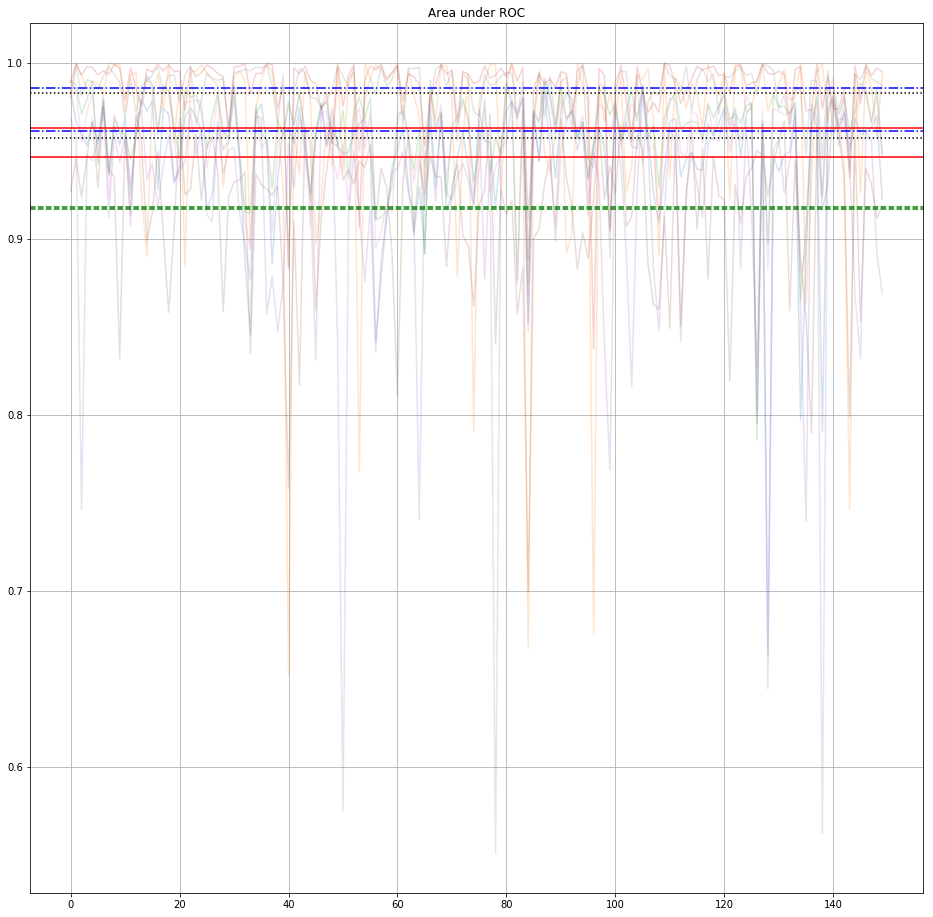

In [46]:
plt.rcParams["figure.figsize"] = (16,16)

plt.plot(agree_L_AUROC, alpha=0.2)
plt.plot(agree_UHF_AUROC, alpha=0.2)

plt.plot(coastguard_L_AUROC, alpha=0.2 )
plt.plot(coastguard_UHF_AUROC , alpha=0.2)

plt.plot(clfd_L_AUROC, alpha=0.2 )
plt.plot(clfd_UHF_AUROC, alpha=0.2 )

plt.plot(mixed_L_AUROC, alpha=0.2 )
plt.plot(mixed_UHF_AUROC, alpha=0.2 )

plt.axhline(np.mean(agree_L_AUROC ) ,color = 'red' , linestyle='-'  )
plt.axhline(np.mean(agree_UHF_AUROC ), color = 'red'  , linestyle='-'   )
plt.axhline(np.mean(clfd_L_AUROC )  ,color = 'green'  , linestyle='--', ) #clfd is the lowest area under the curve
plt.axhline(np.mean(clfd_UHF_AUROC ) ,color = 'green'   , linestyle='--',)
plt.axhline(np.mean(coastguard_L_AUROC ) ,color = 'blue'  ,linestyle='-.'  ) #coastguard is the highest
plt.axhline(np.mean(coastguard_UHF_AUROC ) ,color = 'blue' ,linestyle='-.'   )
plt.axhline(np.mean(mixed_L_AUROC ), color='black' ,linestyle = 'dotted'   )
plt.axhline(np.mean(mixed_UHF_AUROC ), color='black' ,linestyle ='dotted'     )

plt.title("Area under ROC")
plt.grid()
plt.show()

#

In [94]:
np.mean(agree_L_AUPRC ), np.mean(agree_UHF_AUPRC  ) #Same

(0.6594131052634532, 0.6568996901770177)

In [95]:
np.mean(clfd_L_AUPRC ), np.mean(clfd_UHF_AUPRC  ) #L is higher

(0.656130913938332, 0.5719476083140995)

In [96]:
np.mean(coastguard_L_AUPRC ), np.mean(coastguard_UHF_AUPRC  ) #L is Higher

(0.7260664570430371, 0.5498799956853156)

In [97]:
np.mean(mixed_L_AUPRC ), np.mean(mixed_UHF_AUPRC  ) #UHF is higher. I wouldn't be sur

(0.7837274677253395, 0.8582884584311682)

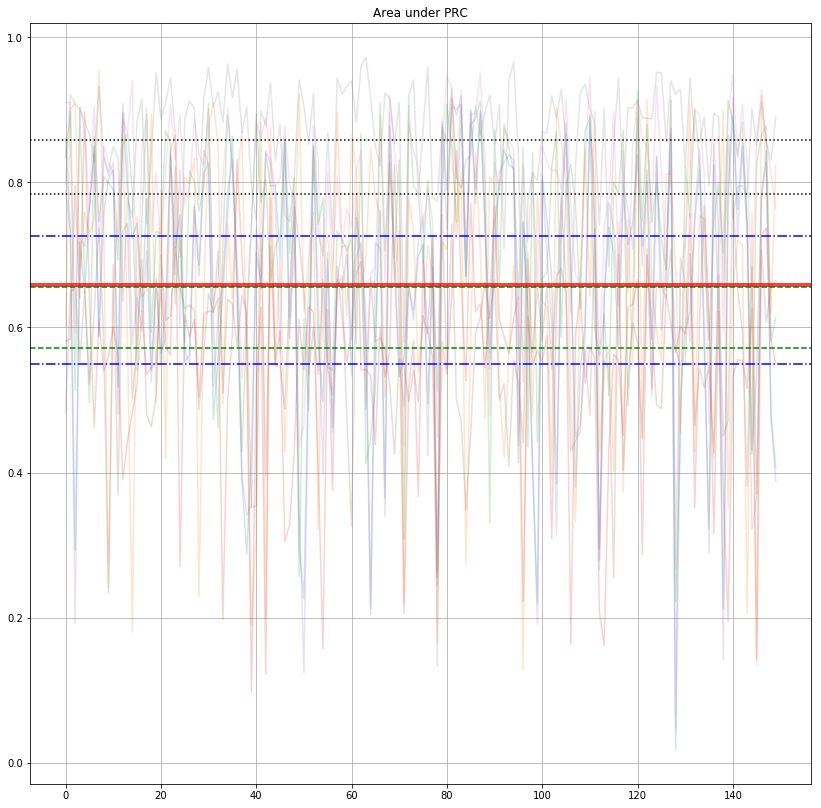

In [62]:
plt.rcParams["figure.figsize"] = (14,14)

plt.plot(agree_L_AUPRC, alpha=0.2  )
plt.plot(agree_UHF_AUPRC, alpha=0.2 )

plt.plot(coastguard_L_AUPRC, alpha=0.2  )
plt.plot(coastguard_UHF_AUPRC, alpha=0.2  )

plt.plot(clfd_L_AUPRC, alpha=0.2  )
plt.plot(clfd_UHF_AUPRC, alpha=0.2  )

plt.plot(mixed_L_AUPRC, alpha=0.2  )
plt.plot(mixed_UHF_AUPRC, alpha=0.2  )

plt.axhline(np.mean(agree_L_AUPRC  ) ,color = 'red' , linestyle='-'  )
plt.axhline(np.mean(agree_UHF_AUPRC  ), color = 'red'  , linestyle='-'   )
plt.axhline(np.mean(clfd_L_AUPRC  )  ,color = 'green'  , linestyle='--', ) #clfd is the lowest area under the curve
plt.axhline(np.mean(clfd_UHF_AUPRC  ) ,color = 'green'   , linestyle='--',)
plt.axhline(np.mean(coastguard_L_AUPRC  ) ,color = 'blue'  ,linestyle='-.'  ) #coastguard is the highest
plt.axhline(np.mean(coastguard_UHF_AUPRC  ) ,color = 'blue' ,linestyle='-.'   )
plt.axhline(np.mean(mixed_L_AUPRC  ), color='black' ,linestyle = 'dotted'   )
plt.axhline(np.mean(mixed_UHF_AUPRC  ), color='black' ,linestyle ='dotted'     )

plt.title("Area under PRC")
plt.grid()
plt.show()

#There is more variability here

In [98]:
np.mean(agree_L_F1score), np.mean(agree_UHF_F1score ) #UHF is higher

(0.6620979358166602, 0.8418072700247567)

In [99]:
np.mean(clfd_L_F1score ), np.mean(clfd_UHF_F1score ) #inconvlusive

(0.6471223907373911, 0.6420461743172383)

In [100]:
np.mean(coastguard_L_F1score ), np.mean(coastguard_UHF_F1score )  #UHF is higher

(0.7799747662551687, 0.9226043993550752)

In [101]:
np.mean(mixed_L_F1score),np.mean(mixed_UHF_F1score ) #UHF is higher

(0.7654361070626741, 0.8957698703455048)

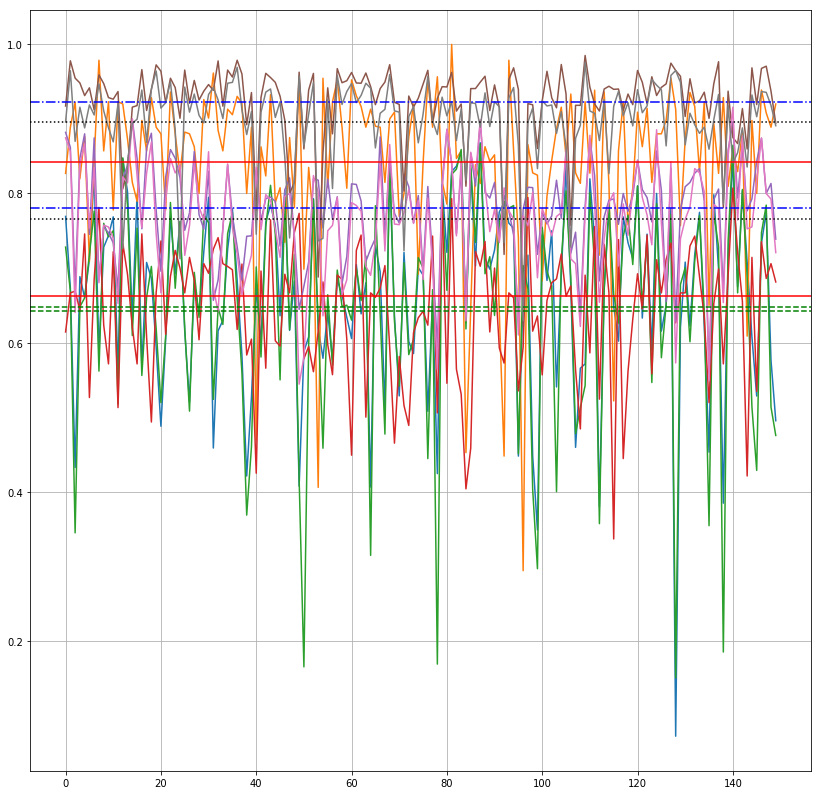

In [70]:
plt.plot(agree_L_F1score)
plt.plot(agree_UHF_F1score)
plt.plot(clfd_L_F1score)
plt.plot(clfd_UHF_F1score)
plt.plot(coastguard_L_F1score)
plt.plot(coastguard_UHF_F1score)
plt.plot(mixed_L_F1score)
plt.plot(mixed_UHF_F1score)

plt.grid()

plt.axhline(np.mean(agree_L_F1score) ,color = 'red' , linestyle='-'  )
plt.axhline(np.mean(agree_UHF_F1score ), color = 'red'  , linestyle='-'   )
plt.axhline(np.mean(clfd_L_F1score )  ,color = 'green'  , linestyle='--', ) #clfd is the lowest area under the curve
plt.axhline(np.mean(clfd_UHF_F1score ) ,color = 'green'   , linestyle='--',)
plt.axhline(np.mean(coastguard_L_F1score ) ,color = 'blue'  ,linestyle='-.'  ) #coastguard is the highest
plt.axhline(np.mean(coastguard_UHF_F1score ) ,color = 'blue' ,linestyle='-.'   )
plt.axhline(np.mean(mixed_L_F1score), color='black' ,linestyle = 'dotted'   )
plt.axhline(np.mean(mixed_UHF_F1score ), color='black' ,linestyle ='dotted'     )

plt.show()